In [1]:
import pandas as pd

In [7]:
returns=pd.read_csv("retdata.csv")

In [8]:
gsyh=returns.gsyh #prices of ICBC 

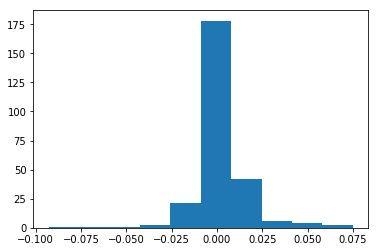

In [11]:
import matplotlib.pyplot as plt
plt.hist(gsyh)
plt.show()

In [16]:
[returns.zglt.mean(),returns.pfyh.mean(),returns.zglt.median(),returns.pfyh.median(),\
 returns.zglt.mode(),returns.pfyh.mode()]
#the return value of mode is Series type (with indexes)

[0.001810969945736434, 0.002264809317829458, 0.0, 0.0, 0    0.0
 dtype: float64, 0    0.0
 dtype: float64]

In [18]:
([returns.zglt.quantile(i) for i in [0.25,0.75]],\
 [returns.pfyh.quantile(i) for i in [0.25,0.75]])
#up and down quartiles (not 'quantiles' !!!)
#above are two list comprehensions

([-0.006525337500000001, 0.008766644], [-0.005472016, 0.009404664])

In [20]:
#Range, MAD, var and SD
[returns.zglt.max()-returns.zglt.min(),\
 returns.zglt.mad(),\
 returns.zglt.var(),\
 returns.zglt.std()]

[0.182285158,
 0.011888591205937145,
 0.0003140948097641627,
 0.017722720157023378]

In [25]:
#Random Variables 
import numpy as np
import pandas as pd
RandomNumber=np.random.choice([1,2,3,4,5],size=100,replace=True,p=[0.1,0.1,0.3,0.3,0.2])
#generate random numbers with distrubution
pd.Series(RandomNumber).value_counts()/100

4    0.31
5    0.26
3    0.21
1    0.12
2    0.10
dtype: float64

In [26]:
HSRet300=pd.read_csv("return300.csv")
HSRet300.head(n=2)

,date,return,sig
0,2014/1/2,-0.3454,0
1,2014/1/3,-1.3436,0


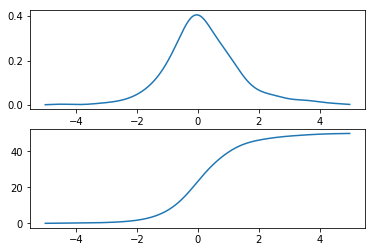

In [32]:
import matplotlib.pyplot as plt
from scipy import stats
density=stats.kde.gaussian_kde(HSRet300.iloc[:,1])#generate Gaussian kernel function
bins=np.arange(-5,5,0.02)#make segmentation
plt.subplot(211)
plt.plot(bins,density(bins))
plt.subplot(212)
plt.plot(bins,density(bins).cumsum())
#estimate distributions

In [33]:
#Binomial, Normal and others
np.random.binomial(100,0.5,20)#n,p and the numbers needed

array([59, 51, 50, 52, 46, 45, 45, 48, 50, 59, 40, 49, 49, 52, 46, 65, 56,
       44, 55, 51])

In [34]:
stats.binom.pmf(20,100,0.5)
#caution the parameter order!!!
#this is probability (20 heads out of 100 throws)

4.2281632676012532e-10

In [37]:
dd=stats.binom.pmf(np.arange(0,21,1),100,0.5)
dd.sum()
#CDF of binomial distribution
#or just use stats.binom.cdf(20,100,0.5) (no less than 20 heads out of 100 throws)

5.5795445286255621e-10

In [44]:
#apply binomial distribution into finance
ret=HSRet300.iloc[:,1]
p=len(ret[ret>0])/len(ret)
#estimate when returns are positive
[p,stats.binom.pmf(6,10,p)]
#use above to calculate binomial probability 

[0.5306122448979592, 0.2275149431566236]

In [49]:
Norm=np.random.normal(size=5)
[stats.norm.pdf(Norm),stats.norm.cdf(Norm)]

[array([ 0.36202708,  0.01807153,  0.33015351,  0.38661954,  0.32512924]),
 array([ 0.67027627,  0.99357251,  0.26919871,  0.59890043,  0.26119097])]

In [ ]:
#VaR
#under some certain probability level, the biggest potential loss
#P(X_t<-VaR)=\alpha%
#1-\alpha% is called confidence level

In [51]:
HSRet300_RetMean=ret.mean()
HSRet300_RetVar=ret.var()
stats.norm.ppf(0.05,HSRet300_RetMean,ret.var()**0.5)
#ppf is used to get the quantile which has 0.05 cdf
#then the opposite number of the value above is VaR

-1.8176732130631714

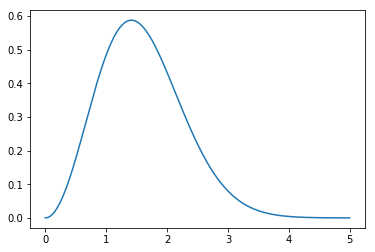

In [55]:
#The three distributions
plt.plot(np.arange(0,5,0.002)\
         ,stats.chi.pdf(np.arange(0,5,0.002),3))

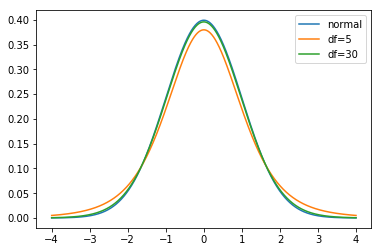

In [56]:
x=np.arange(-4,4.004,0.004)
plt.plot(x,stats.norm.pdf(x),label='normal')
plt.plot(x,stats.t.pdf(x,5),label='df=5')
plt.plot(x,stats.t.pdf(x,30),label='df=30')
plt.legend()

/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


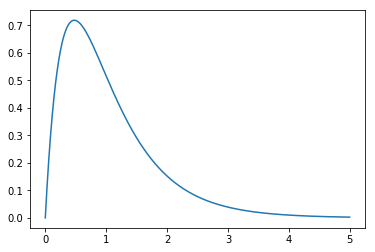

In [57]:
plt.plot(np.arange(0,5,0.002),\
        stats.f.pdf(np.arange(0,5,0.002),4,40))

Text(0,0.5,'SZ')

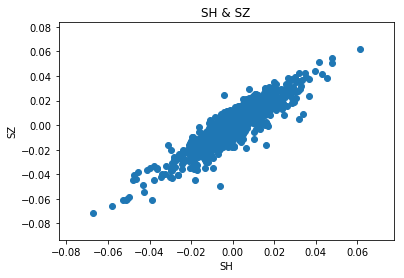

In [60]:
#analysis of the corrilation between SH and SZ
TRD_Index=pd.read_csv('TRD_Index.txt',sep='\t')
SHindex=TRD_Index[TRD_Index.Indexcd==1]#000001
SZindex=TRD_Index[TRD_Index.Indexcd==399106]#399106
plt.scatter(SHindex.Retindex,SZindex.Retindex)
plt.title('SH & SZ')
plt.xlabel('SH')
plt.ylabel('SZ')

In [62]:
SZindex.index=SHindex.index
SZindex.Retindex.corr(SHindex.Retindex)

0.90827763480145474